In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
df = pd.read_csv('Reviews.csv')
df.sample(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
463847,463848,B0000SXEKA,A2C0712DLYODP5,M. Driscoll,9,9,1,1166572800,Maltodextrin impacts blood sugar!,Please note that Sweet 'n Low sugar free frost...
356643,356644,B0018STXM4,A1P7K3YWFZB19F,K. Connell,0,1,5,1242345600,Herr's chips are the best!,These ketchup chips are so good that even my n...
247327,247328,B000EOXQS0,A8LVI41BC3DWJ,"J. Menard ""Book Lover""",0,0,5,1314576000,Light soups,I love this cup a soup. It's is very light on...


In [3]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,568454,NaN,NaN,NaN,284228,164099,1,142114,284228,426341,568454
ProductId,568454,74258,B007JFMH8M,913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UserId,568454,256059,A3OXHLG6DIBRW8,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProfileName,568438,218416,"C. F. Hill ""CFH""",451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HelpfulnessNumerator,568454,NaN,NaN,NaN,1.74382,7.63651,0,0,0,2,866
HelpfulnessDenominator,568454,NaN,NaN,NaN,2.22881,8.28974,0,0,1,2,923
Score,568454,NaN,NaN,NaN,4.1832,1.31044,1,4,5,5,5
Time,568454,NaN,NaN,NaN,1.29626e+09,4.80433e+07,9.39341e+08,1.27129e+09,1.31112e+09,1.33272e+09,1.35121e+09
Summary,568428,295743,Delicious!,2462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Text,568454,393579,"This review will make me sound really stupid, ...",199,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   26
Text                       0
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.count()

Id                        568412
ProductId                 568412
UserId                    568412
ProfileName               568412
HelpfulnessNumerator      568412
HelpfulnessDenominator    568412
Score                     568412
Time                      568412
Summary                   568412
Text                      568412
dtype: int64

Before going to Univariate analysis we will first manupulate the data

In [8]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [9]:
df.columns = ['id', 'productid', 'userid', 'profilename', 'helpnum',
       'helpden', 'score', 'time', 'summary', 'text']

we will add total umber of words and total number of characters from the text to analyse the rating

In [10]:
df['text']=df['text'].astype(str)
df['reviewlen']=df['text'].apply(len)

In [11]:
df['summary']=df['summary'].astype(str)
df['summarylen']=df['summary'].apply(len)

Univariate analysis

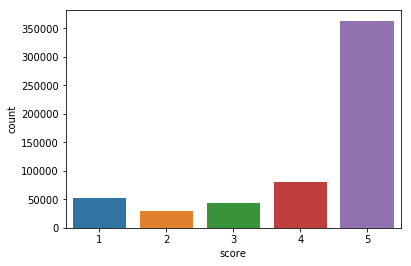

In [12]:
sns.countplot(df.score)

In [13]:
df.columns

Index(['id', 'productid', 'userid', 'profilename', 'helpnum', 'helpden',
       'score', 'time', 'summary', 'text', 'reviewlen', 'summarylen'],
      dtype='object')

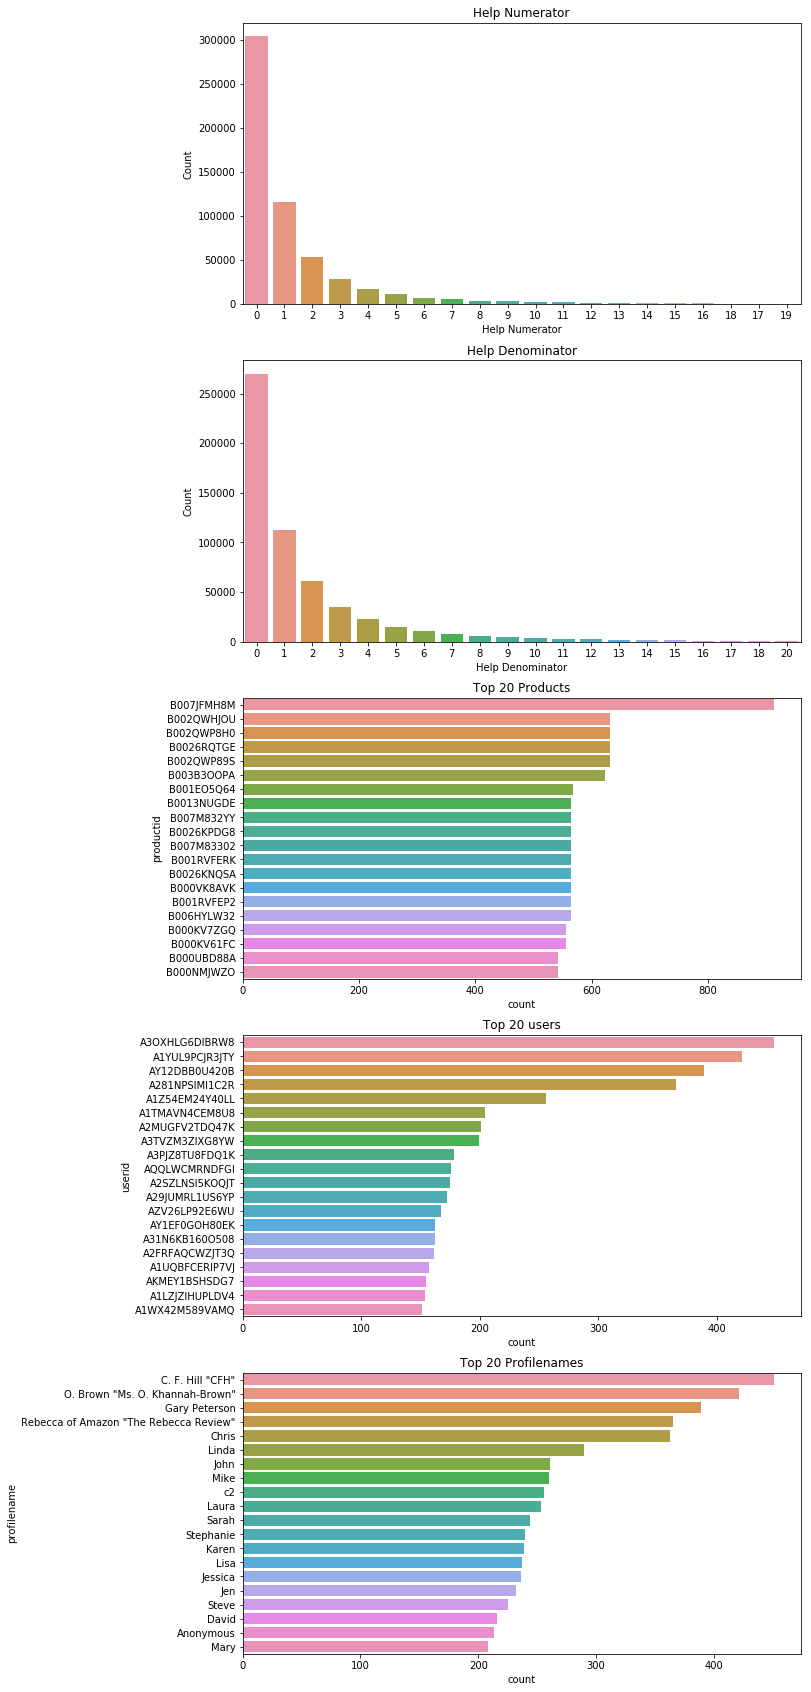

In [14]:
#import matplotlib.gridspec as gridspec
f, (ax0, ax1,ax2,ax3,ax4) = plt.subplots(5, figsize = (10,30))

sns.countplot(x = 'helpnum', data = df[df["helpnum"].isin(df["helpnum"].value_counts()[:20].index)],
                        order=df["helpnum"].value_counts().iloc[:20].index, ax = ax0)
ax0.set_title('Help Numerator')
ax0.set_xlabel('Help Numerator')
ax0.set_ylabel('Count')


sns.countplot(x = 'helpden', data = df[df["helpden"].isin(df["helpden"].value_counts()[:20].index)],
                        order=df["helpden"].value_counts().iloc[:20].index, ax= ax1)
ax1.set_title('Help Denominator')
ax1.set_xlabel('Help Denominator')
ax1.set_ylabel('Count')

sns.countplot(y = 'productid', data = df[df["productid"].isin(df["productid"].value_counts()[:20].index)],
                        order=df["productid"].value_counts().iloc[:20].index, ax = ax2)
ax2.set_title('Top 20 Products')


sns.countplot(y = 'userid', data = df[df["userid"].isin(df["userid"].value_counts()[:20].index)],
                        order=df["userid"].value_counts().iloc[:20].index, ax = ax3)
ax3.set_title('Top 20 users')

sns.countplot(y = 'profilename', data = df[df["profilename"].isin(df["profilename"].value_counts()[:20].index)],
                        order=df["profilename"].value_counts().iloc[:20].index, ax = ax4)
ax4.set_title('Top 20 Profilenames')




#plt.tight_layout()



[]

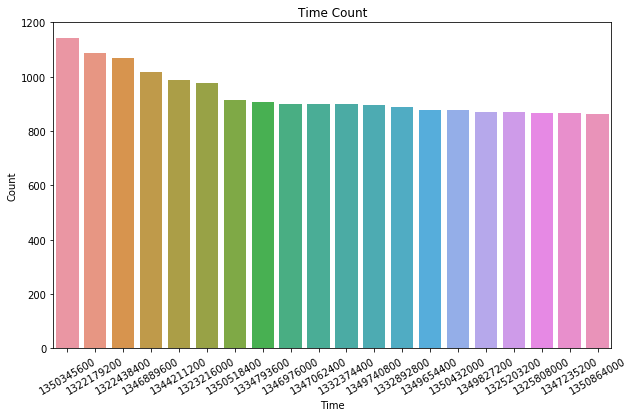

In [15]:
plt.figure(figsize =(10,6))
g = sns.countplot(x= 'time', data = df[df["time"].isin(df["time"].value_counts()[:20].index)],
                        order=df["time"].value_counts().iloc[:20].index)
g.set_xlabel('Time', )
g.set_ylabel('Count')
g.set_title('Time Count')
plt.xticks(rotation=30)
g.plot()

Bivariate Analysis

In [16]:
df.columns

Index(['id', 'productid', 'userid', 'profilename', 'helpnum', 'helpden',
       'score', 'time', 'summary', 'text', 'reviewlen', 'summarylen'],
      dtype='object')

In [17]:
rating = df.groupby('score').mean()
rating.corr()

,id,helpnum,helpden,time,reviewlen,summarylen
id,1.000000,0.006329,-0.186124,-0.650144,-0.980501,-0.986909
helpnum,0.006329,1.000000,0.976505,0.740186,-0.015512,-0.030980
helpden,-0.186124,0.976505,1.000000,0.862355,0.167606,0.144559
time,-0.650144,0.740186,0.862355,1.000000,0.610868,0.599130
reviewlen,-0.980501,-0.015512,0.167606,0.610868,1.000000,0.984929
summarylen,-0.986909,-0.030980,0.144559,0.599130,0.984929,1.000000


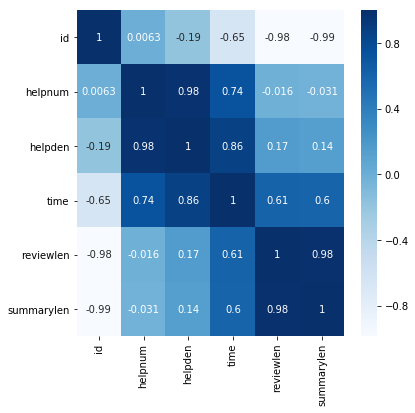

In [18]:
plt.figure(figsize = (6,6))
sns.heatmap(rating.corr(), annot = True, cmap="Blues")

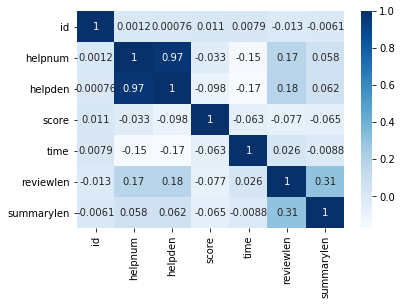

In [19]:
sns.heatmap(df.corr(), annot = True, cmap="Blues")

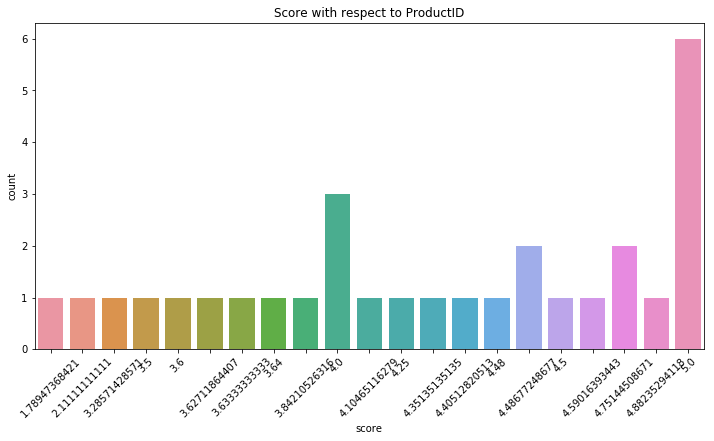

In [20]:
plt.figure(figsize = (12,6))
plt.xlabel('Score' )
plt.ylabel('Count')
plt.title('Score with respect to ProductID')
plt.xticks(rotation=45)
sns.countplot(df.groupby('productid').score.mean().iloc[:30])

In [21]:
df.columns

Index(['id', 'productid', 'userid', 'profilename', 'helpnum', 'helpden',
       'score', 'time', 'summary', 'text', 'reviewlen', 'summarylen'],
      dtype='object')

In [22]:
df[df.reviewlen > 3000].count()

id             2174
productid      2174
userid         2174
profilename    2174
helpnum        2174
helpden        2174
score          2174
time           2174
summary        2174
text           2174
reviewlen      2174
summarylen     2174
dtype: int64

In [23]:
data['monyer'] = pd.to_datetime(df['time'], unit = 's')
monyer = data.groupby([data.monyer.dt.year, data.monyer.dt.month, data.score]).count()['productid'].unstack()
#sns.pointplot(monyer)
monyer.plot(figsize = (20,8))
plt.title('Rating with respect to Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation = 30)

NameError: name 'data' is not defined

In [ ]:
#df.drop(df.reviewlen > 5000, axis = 1)
df = df[df.reviewlen < 3000]
#df[df.reviewlen > 3000].score.mean()

In [ ]:
g = sns.FacetGrid(data=df, col='score')
g.map(plt.hist, 'reviewlen', bins=50)
g = sns.FacetGrid(data=df, col='score')
g.map(plt.hist, 'summarylen', bins=50)

For the data the Quartile 1 and the Quartile 3 lies from nearly 200 and the 1000. The values lie outside Quartile 1 and Quartile 3 are Outliers which is often called as the dirty data which may be useful while the training. But not representing the bar plot graphs.

In [ ]:
data = df[df.reviewlen < 1000]
plt.figure(figsize=(10,6))
sns.boxplot(x='score', y='reviewlen', data=data)
plt.xlabel('Score')
plt.ylabel('review length')
plt.title('Score with respect to Review Length')
#plt.xticks(rotation=30)

In [ ]:
sns.violinplot(x='score', y='summarylen', data=data)
plt.xlabel('Score')
plt.ylabel('review length')
plt.title('Score with respect to Review Length')
plt.plot()

In [ ]:
#df['helpnum'].value_counts()
#sns.countplot(df.groupby('score').helpnum.sum())
f, (ax0, ax1) = plt.subplots(1,2, figsize = (20,6))
sns.barplot(x ='score', y = df.groupby('score').helpnum.sum(), data = df, ax=ax0)
ax0.set_title('Help Numerator vs Score')
ax0.set_xlabel('Score')
ax0.set_ylabel('Help Numerator')

sns.barplot(x ='score', y = df.groupby('score').helpden.sum(), data = df, ax=ax1)
ax1.set_title('Help Denominator vs Score')
ax1.set_xlabel('Score')
ax1.set_ylabel('Help Denominator')

We will plot the most repeated word in the Summary

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
#from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
import re

In [ ]:
nltk.download("stopwords")
nltk.download('punkt')
a = df['summary'].str.lower().str.cat(sep=' ')
c = df['text'].str.lower().str.cat(sep=' ')
# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)
d = re.sub('[^A-Za-z]+', ' ', c)
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
word_tokens2 = word_tokenize(d)

In [ ]:
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
        
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]  
word_dist = nltk.FreqDist(cleaned_data_title)

In [ ]:
top = 100
rslt = pd.DataFrame(word_dist.most_common(top),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(20))
plt.xticks(rotation =30)
plt.savefig("output.png")

In [ ]:
filtered_sentence2 = [w for w in word_tokens2 if not w in stop_words]
filtered_sentence2 = []
for w in word_tokens2:
    if w not in stop_words:
        filtered_sentence2.append(w)
        
without_single_chr2 = [word for word in filtered_sentence2 if len(word) > 2]

# Remove numbers
cleaned_data_title2 = [word for word in without_single_chr2 if not word.isnumeric()]  
word_dist2 = nltk.FreqDist(cleaned_data_title2)
rslt2 = pd.DataFrame(word_dist2.most_common(top),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt2.head(20))
plt.xticks(rotation =30)
plt.savefig("output2.png")

Pre Processing of the data 

The score is divided into 5 grades, now we will make it into 3 for making the training simpler

In [ ]:
without_single_chr[:10]